In [1]:
from random import randint

In [2]:
bits =[]
for i in range(8):
    bit = randint(0,1)
    bits.append(bit)

In [3]:
bits

[1, 0, 1, 1, 1, 1, 1, 1]

In [4]:
from random import choice

In [5]:
basis = []
for i in range(8):
    base = choice(['X','Z'])
    basis.append(base)

In [6]:
basis

['X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z']

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import IGate
q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(q,c)

In [11]:
num_qubits = qc.num_qubits

In [12]:
for i in range(num_qubits):
    if basis[i] == 'Z':
        if bits[i] == 0:
            qc.append(IGate(), [qc.qubits[i]])
        else:
            qc.x(qc.qubits[i])
    else:
        if bits[i] == 0:
            qc.h(qc.qubits[i])
        else:
            qc.x(qc.qubits[i])
            qc.h(qc.qubits[i])

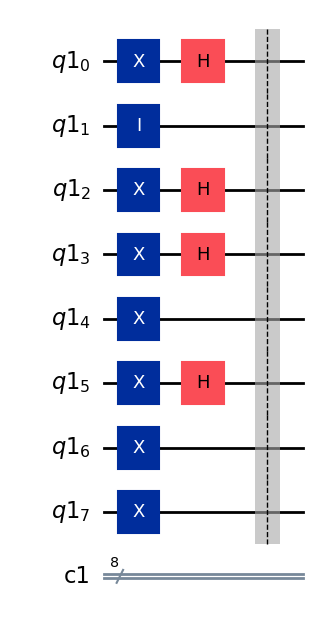

In [13]:
qc.barrier()
qc.draw('mpl')

In [ ]:
bobs_base =[]
for i in range(num_qubits):
    base = choice(['X','Z'])
    bobs_base.append(base)

In [15]:
bobs_base

['Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z']

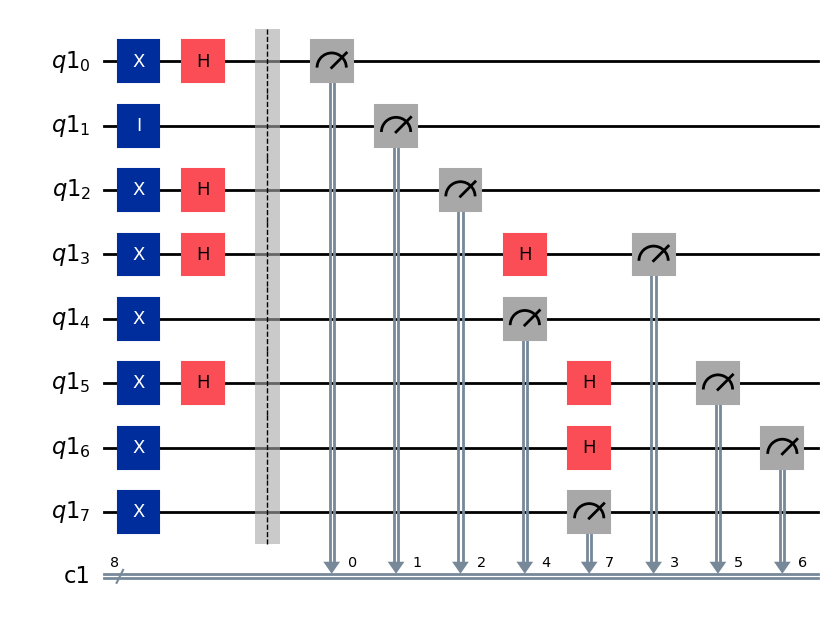

In [16]:
for i in range(8):
    if bobs_base[i]=='Z':
        qc.measure(q[i],c[i])
    else:
        qc.h(q[i])
        qc.measure(q[i],c[i])
qc.draw('mpl')